## Curso de Fundamentos de Machine Learning 

### Escalado de datos 

In [3]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar dataset preparado 
df = pd.read_csv('../data/data.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [7]:
# Aplicar Normalización a tiro al arco (aprox 0-15 tiros)
scaler = MinMaxScaler()

df['tiros_arco_local_norm'] = scaler.fit_transform(df[['tiros_arco_local']])
df['tiros_arco_visitante_norm'] = scaler.fit_transform(df[['tiros_arco_visitante']])

# Ver resultados
print(df[['tiros_arco_local', 'tiros_arco_local_norm']].head(9))
print(df[['tiros_arco_visitante', 'tiros_arco_visitante_norm']].head(9))

   tiros_arco_local  tiros_arco_local_norm
0                12               1.000000
1                12               1.000000
2                10               0.777778
3                 3               0.000000
4                 7               0.444444
5                 8               0.555556
6                 4               0.111111
7                 5               0.222222
8                 9               0.666667
   tiros_arco_visitante  tiros_arco_visitante_norm
0                     6                   0.333333
1                     3                   0.000000
2                     7                   0.444444
3                     3                   0.000000
4                    12                   1.000000
5                    11                   0.888889
6                     8                   0.555556
7                     5                   0.222222
8                     9                   0.666667


In [10]:
# Aplicar Estandarización a la posesión (0-100%)
scaler = StandardScaler()

df['posesion_local_std'] = scaler.fit_transform(df[['posesion_local (%)']])
df['posesion_visitante_std'] = scaler.fit_transform(df[['posesion_visitante (%)']])

# Ver resultados
print(df[['posesion_local (%)', 'posesion_local_std']].head(9))
print(df[['posesion_visitante (%)', 'posesion_visitante_std']].head(9))

   posesion_local (%)  posesion_local_std
0                  54            0.624415
1                  60            1.623479
2                  55            0.790926
3                  57            1.123947
4                  52            0.291394
5                  60            1.623479
6                  49           -0.208138
7                  56            0.957436
8                  60            1.623479
   posesion_visitante (%)  posesion_visitante_std
0                      46               -0.624415
1                      40               -1.623479
2                      45               -0.790926
3                      43               -1.123947
4                      48               -0.291394
5                      40               -1.623479
6                      51                0.208138
7                      44               -0.957436
8                      40               -1.623479


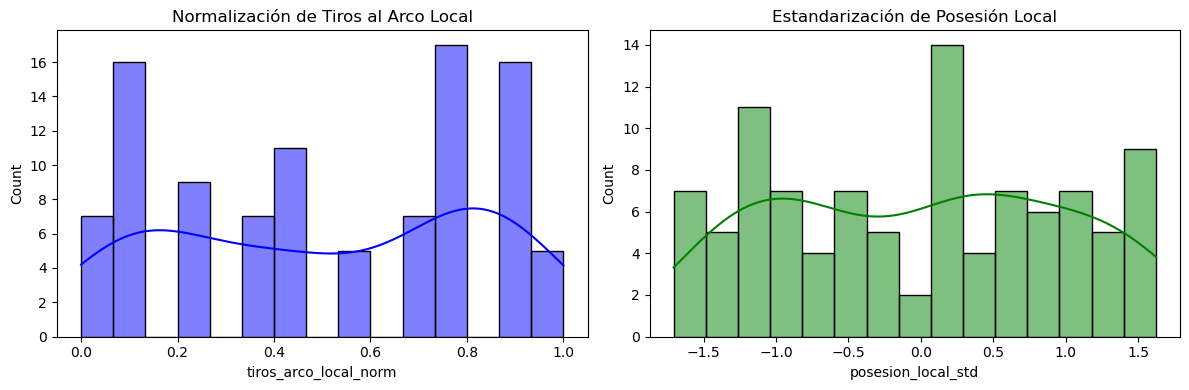

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos figura para 2 subgráficas
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Visualizar Normalización de Tiros al Arco
sns.histplot(df['tiros_arco_local_norm'], bins=15, kde=True, ax=ax[0], color='blue', label='Local')
ax[0].set_title('Normalización de Tiros al Arco Local')

# Visualizar posesión local (Estandarización)
sns.histplot(df['posesion_local_std'], bins=15, kde=True, ax=ax[1], color='green', label='Local')
ax[1].set_title('Estandarización de Posesión Local')

plt.tight_layout()
plt.show()